In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import multivariate_normal, norm

Activity 1

In [2]:
N_values = [1, 2, 10]  # Number of variables to sum
num_samples = 10000  # Number of samples

#Dictionary 
results = {}

for N in N_values:
    rand_samples = np.random.uniform(0, 1, (num_samples, N))
    rand_samples_means = np.mean(rand_samples, axis=1)

    results[f'rand_samples_{N}'] = rand_samples
    results[f'rand_samples_means_{N}'] = rand_samples_means
    
#print(results['rand_samples_2'])
#print(results['rand_samples_means_2'])

#plt.hist(results['rand_samples_means_10'], bins = 20)

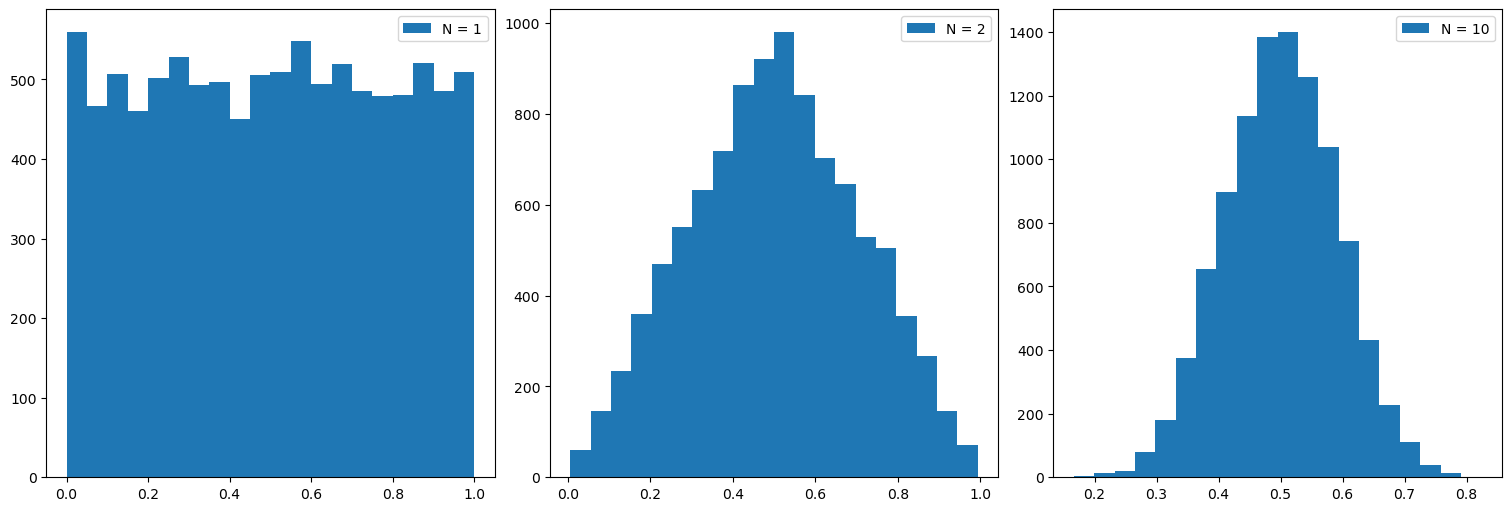

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

for i, num in enumerate(N_values):
    axes[i].hist(results[f'rand_samples_means_{num}'], bins = 20, label = f"N = {num}")
    axes[i].legend()

plt.show()

0.5006712396004774 0.0910464254316084


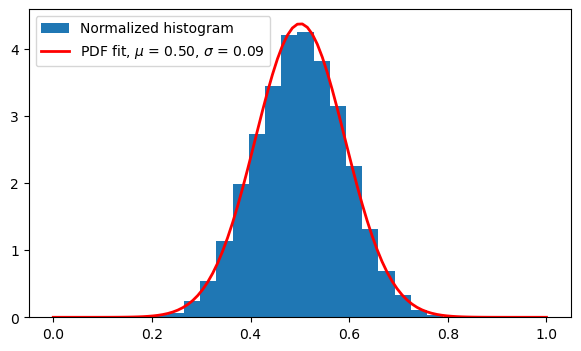

In [6]:
mu, std = norm.fit(results['rand_samples_means_10'])
print(mu, std)

x = np.linspace(0, 1, 100)
p = norm.pdf(x, mu, std)

#Plotting
plt.figure(figsize=(7, 4))
plt.hist(results['rand_samples_means_10'], bins = 20, density=1, label = 'Normalized histogram')
plt.plot(x, p, c='red', linewidth=2, label = f'PDF fit, $\\mu$ = {mu:.2f}, $\\sigma$ = {std:.2f}')
plt.legend()
plt.show()

# Activity - 2
## Analysis - 1

In [10]:
cov = np.array([[4, 2], [2, 16]])
mean = np.array([0, 0])

In [12]:
events = np.random.multivariate_normal(mean, cov, 1000)
x_coord, y_coord = events[:,0], events[:,1]

In [14]:
#print(x_coord, y_coord)

## Analysis - 2.

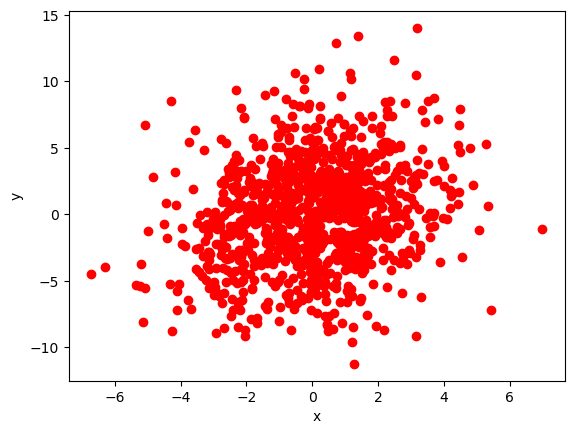

In [17]:
plt.scatter(x_coord, y_coord, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

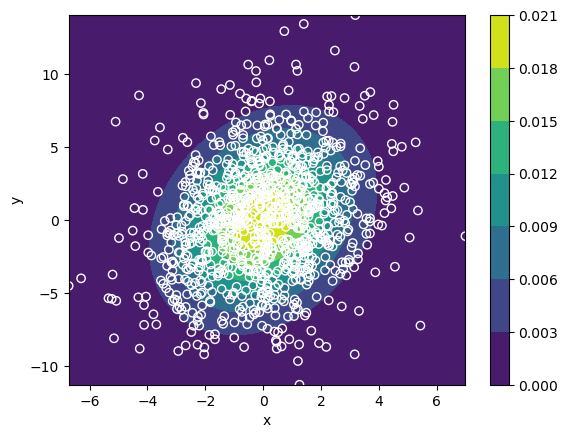

In [35]:
#generate a grid and define pdf for grid points
x = np.linspace(min(x_coord), max(x_coord), 500)
y = np.linspace(min(y_coord), max(y_coord), 500)
X, Y = np.meshgrid(x, y)
grid = np.dstack((X, Y))
Z = multivariate_normal(mean, cov).pdf(grid)
contour = plt.contourf(X, Y, Z) 
plt.colorbar(contour)
plt.scatter(x_coord, y_coord, facecolors='none', edgecolors='white', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
a = np.array([[1,2], [4, 5]])

In [7]:
a[:,1] ## 2nd column

array([2, 5])

In [8]:
a[:,0] ## 1st column

array([1, 4])